In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### 1. Get the Dataset

In [2]:
from pathlib import Path
import tarfile
import urllib.request

#### 1.1 Download Data

In [3]:
def load_housing_data():
    tarball_path = Path('datasets/housing.tgz')
    if not tarball_path.is_file():
        path('dataset').mkdir(parents=True, exist_ok=True)
        url = "https://github.com/ageron/data/raw/main/housing.tgz"
        urllib.request.urlretrieve(url, tarball_path)
    with tarfile.open(tarball_path) as housing_tarball:
        housing_tarball.extractall(path='datasets')
    return pd.read_csv(Path("datasets/housing/housing.csv"))

In [4]:
housing = load_housing_data()


C:\Users\Administrator\AppData\Local\Temp\ipykernel_10568\1513742191.py:8: DeprecationWarning: Python 3.14 will, by default, filter extracted tar archives and reject files or modify their metadata. Use the filter argument to control this behavior.
  housing_tarball.extractall(path='datasets')


### 1.2 Quick look at data

In [5]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


<h5 style="color:yellow">NOTE</h5>
total_bedrooms has a null value,  meaning that
 207 districts are missing this feature<br>
all of them are numerical and one of them is categorical

In [6]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


<h5 style="color:yellow">NOTE</h5>
that the null values are ignored (so, for example, the count of total_bedrooms is 20,433,
not 20,640)

In [7]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


<h5 style="color:yellow">NOTE</h5>
1. the median income attribute does not look like it is expressed in
US dollars (USD). After checking with the team that collected the data,
you are told that the data has been scaled and capped at 15 (actually,
15.0001) for higher median incomes, and at 0.5 (actually, 0.4999) for
lower median incomes. The numbers represent roughly tens of
thousands of dollars (e.g., 3 actually means about $30,000). Working
with preprocessed attributes is common in machine learning, and it is
not necessarily a problem, but you should try to understand how the data
was computed<br>
2. The housing median age and the median house value were also capped.<br>
3. These attributes/features have very different scales.<br>
4. Many histograms are skewed-right

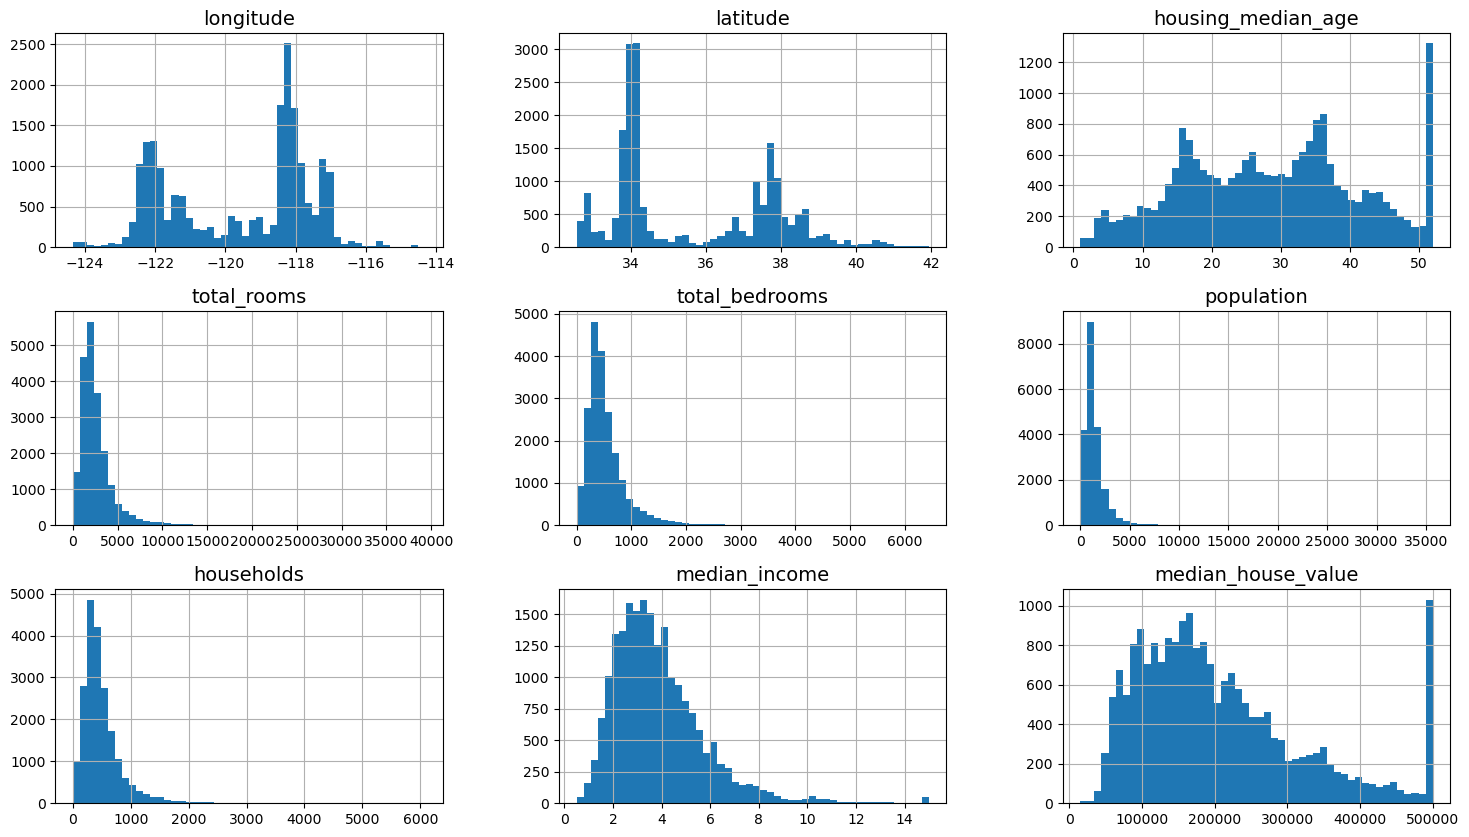

In [8]:
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
housing.hist(bins=50, figsize=(18, 10))
plt.show()

### 1.3 Creating a test set

Creating a test set is theoretically simple; pick some instances randomly,
typically 20% of the dataset (or less if your dataset is very large), and set
them aside:

 Suppose you’ve chatted with some experts who told you that the `median income` is a very important attribute to predict `median housing` prices

##### stratified sampling:
population is divided into homogeneous subgroups called `strata`, and the right
number of instances are sampled from each stratum to guarantee that the test
set is representative of the overall population

In [9]:
housing['income_cat'] = pd.cut(housing['median_income'],
                              bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                              labels=[1, 2, 3, 4, 5])

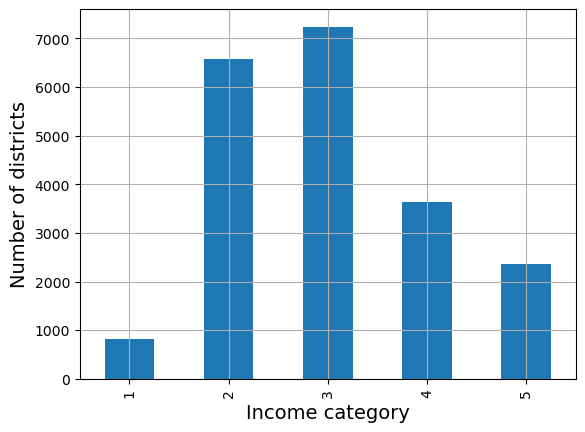

In [10]:
housing['income_cat'].value_counts().sort_index().plot(kind='bar', grid=True)
plt.xlabel("Income category")
plt.ylabel("Number of districts")
plt.show()

<h5 style="color:yellow">NOTE</h5>
 Now you are ready to do stratified sampling based on the income category

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
strat_train_set, strat_test_set = train_test_split(housing, stratify=housing['income_cat'], test_size=0.2, random_state=42)

In [13]:
strat_test_set.shape

(4128, 11)

In [14]:
strat_train_set.shape


(16512, 11)

In [15]:
def income_cat_proportions(data):
    return data['income_cat'].value_counts() / len(data)
rnd_train_set, rnd_test_set = train_test_split(housing, test_size=0.2, random_state=42)

compare_prop = pd.DataFrame({
    "Overall %": income_cat_proportions(housing),
    "Stratified %": income_cat_proportions(strat_test_set),
    "Random %": income_cat_proportions(rnd_test_set)
}).sort_index()
compare_prop["Strat. Error%"] = (compare_prop["Stratified %"] / compare_prop["Overall %"] -1)
compare_prop["Random. Error%"] = (compare_prop["Random %"] / compare_prop["Overall %"] -1)
(compare_prop * 100).round(2)

,Overall %,Stratified %,Random %,Strat. Error%,Random. Error%
income_cat,,,,,
1,3.98,4.00,4.24,0.36,6.45
2,31.88,31.88,30.74,-0.02,-3.59
3,35.06,35.05,34.52,-0.01,-1.53
4,17.63,17.64,18.41,0.03,4.42
5,11.44,11.43,12.09,-0.08,5.63


#### Why -1 is Used:
Mathematically, this is calculating the relative error:

`Relative Error Formula = (Sample Proportion / Overall Proportion) - 1`



#### NOTE:
compares the income category proportions in the
overall dataset, in the test set generated with `stratified sampling`, and in a test
set generated using `purely random sampling`. As you can see, the test set
generated using stratified sampling has income category proportions almost
identical to those in the full dataset, whereas the test set generated using
purely random sampling is `skewed`

You won’t use the `income_cat` column again, so you might as well `drop` it, reverting the data back to its original state:

In [16]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop('income_cat', axis=1, inplace=True)

### 2. Explore and Visualize the Data to Gain Insights

In [26]:
housing = strat_train_set.copy()
housing.head(1)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
13096,-122.42,37.8,52.0,3321.0,1115.0,1576.0,1034.0,2.0987,458300.0,NEAR BAY


#### 2.1 Visualizing Geographical Data
Because the dataset includes geographical information (`latitude / longitude`), it is a good idea to create a scatterplot of all the districts to
visualize the data<br> you look at the housing prices The radius of each circle
represents the district’s population (`option s`), and the color represents the
price (`option c`). Here you use a predefined color map (`option cmap`) called
jet, which ranges from blue (low values) to red (high prices):

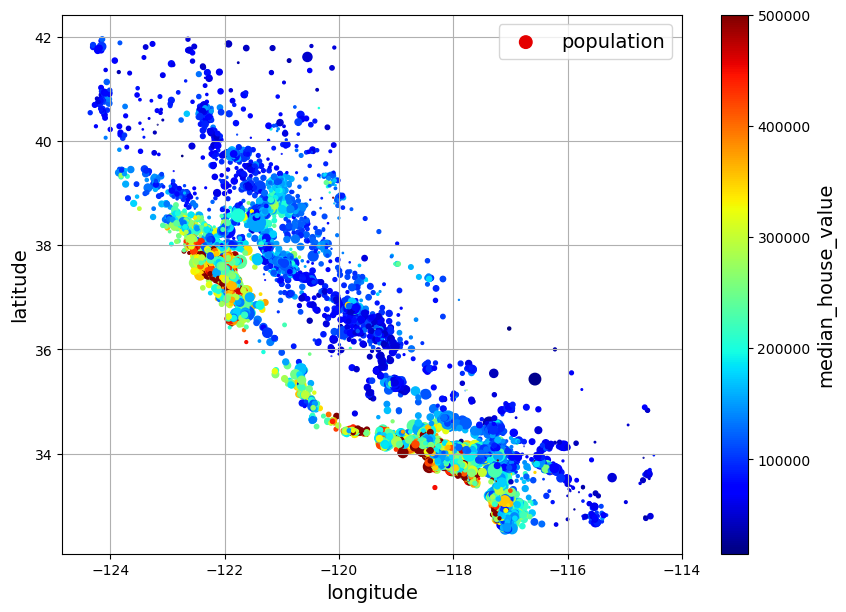

In [33]:
housing.plot(kind="scatter", x='longitude', y='latitude',
             grid=True, s=housing['population'] / 100, label='population',
             c='median_house_value', cmap='jet', colorbar=True,
             legend=True, sharex=False, figsize=(10,7))
plt.show()

This image tells you that the housing prices are very much related to the location 

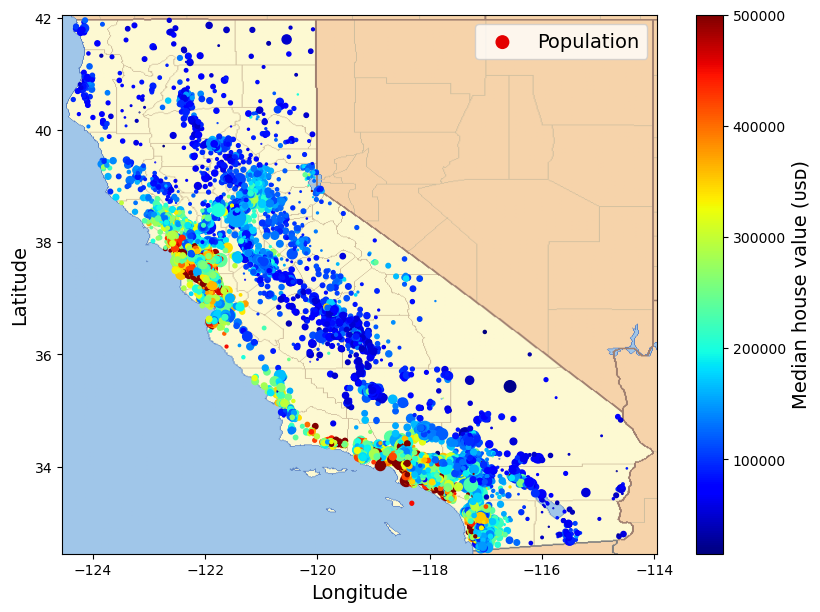

In [35]:
# Download the California image
IMAGES_PATH = Path() / "images" / "python_code"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

filename = "california.png"
if not (IMAGES_PATH / filename).is_file():
    homl3_root = "https://github.com/ageron/handson-ml3/raw/main/"
    url = homl3_root + "images/end_to_end_project/" + filename
    print("Downloading", filename)
    urllib.request.urlretrieve(url, IMAGES_PATH / filename)

housing_renamed = housing.rename(columns={
    "latitude": "Latitude", "longitude": "Longitude",
    "population": "Population",
    "median_house_value": "Median house value (ᴜsᴅ)"})
housing_renamed.plot(
             kind="scatter", x="Longitude", y="Latitude",
             s=housing_renamed["Population"] / 100, label="Population",
             c="Median house value (ᴜsᴅ)", cmap="jet", colorbar=True,
             legend=True, sharex=False, figsize=(10, 7))

california_img = plt.imread(IMAGES_PATH / filename)
axis = -124.55, -113.95, 32.45, 42.05
plt.axis(axis)
plt.imshow(california_img, extent=axis)

plt.show()

#### 2.2 Correlation
##### We want to find which features are most effective on `median_house_value`
 The correlation coefficient ranges from –1 to 1. When it is close to 1, it
 means that there is a `strong positive correlation`; for example, the median
 house value tends to go up when the median income goes up.<br>
  `small negative correlation` between the latitude and the median
 house value (i.e., prices have a slight tendency to go down when you go
 north).


In [40]:
corr_matrix = housing.corr(numeric_only=True)
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688380
total_rooms           0.137455
housing_median_age    0.102175
households            0.071426
total_bedrooms        0.054635
population           -0.020153
longitude            -0.050859
latitude             -0.139584
Name: median_house_value, dtype: float64

##### NOTE
First, the correlation is indeed quite strong<br> Second, the price cap you noticed earlier is clearly visible as a horizontal line
at 500,000<br> But the plot also reveals other less obvious straight lines: a
 horizontal line around 450,000, another around 350,000, perhaps one
 around 280,000, and a few more below that. You may want to try removing
 the corresponding districts to prevent your algorithms from learning to
 reproduce these data quirks.

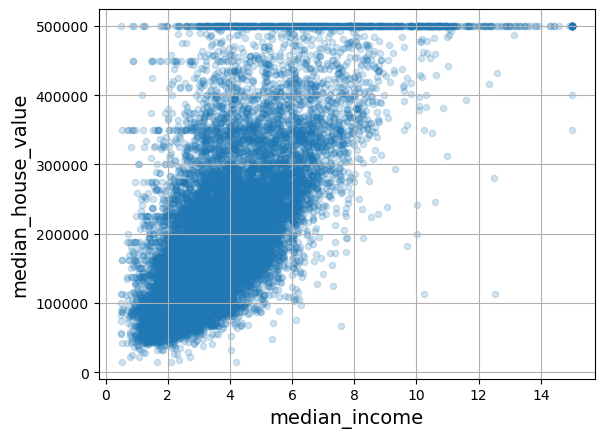

In [47]:
housing.plot(kind='scatter', x='median_income', y='median_house_value', grid=True, alpha=0.2)
plt.show()

#### 2.3 Experimenting with Attribute Combinations